# Data Exploration


In [12]:
non_countries = [
    'Africa', 'Anguilla', 'Antarctica', 'Aruba', 'Asia', 'Asia (excl. China and India)',
    'Bermuda', 'Bonaire Sint Eustatius and Saba', 'British Virgin Islands', 'Christmas Island',
    'Cook Islands', 'Curacao', 'Europe', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
    'European Union (27)', 'European Union (28)', 'Faroe Islands', 'French Polynesia',
    'Greenland', 'High-income countries', 'Hong Kong', 'International aviation',
    'International shipping', 'Kosovo', 'Low-income countries', 'Lower-middle-income countries',
    'Macao', 'Micronesia (country)', 'Montserrat', 'New Caledonia', 'Niue', 'North America',
    'North America (excl. USA)', 'Oceania', 'Saint Helena', 'Saint Pierre and Miquelon',
    'Sint Maarten (Dutch part)', 'South America', 'Turks and Caicos Islands', 'Wallis and Futuna','Upper-middle-income countries',
    'World'
]
df = pd.read_csv('/content/drive/MyDrive/4_Dataset_Cleaned.csv')

df['is_country'] = ~df['country'].isin(non_countries)

print("First 5 rows with new 'is_country' column:")
print(df[['country', 'year', 'is_country']].head())
print(df[['country', 'year', 'is_country']].tail())

First 5 rows with new 'is_country' column:
       country  year  is_country
0  Afghanistan  1850        True
1  Afghanistan  1851        True
2  Afghanistan  1852        True
3  Afghanistan  1853        True
4  Afghanistan  1854        True
        country  year  is_country
39932  Zimbabwe  2019        True
39933  Zimbabwe  2020        True
39934  Zimbabwe  2021        True
39935  Zimbabwe  2022        True
39936  Zimbabwe  2023        True


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_countries = df[df['is_country'] == True]

unique_countries = df_countries['country'].unique()
print('1. Unique countries:', unique_countries)

num_years = df['year'].nunique()
print('2. Total number of years:', num_years)

earliest_year = df['year'].min()
latest_year = df['year'].max()
print(f'3. Earliest year: {earliest_year}, Latest year: {latest_year}')

total_co2_latest = df_countries[df_countries['year'] == latest_year]['co2'].sum()
print(f'4. Total CO₂ emissions in {latest_year} (countries only): {total_co2_latest:.2f} million tonnes')

top5_countries = df_countries.groupby('country')['co2'].sum().nlargest(5)
print('5. Top 5 countries by total CO₂ emissions (million tonnes):\n', top5_countries)

india_avg_co2 = df_countries[df_countries['country'] == 'India']['co2'].mean()
print(f'6. Average CO₂ emission per year for India: {india_avg_co2:.2f} million tonnes')

max_co2 = df_countries['co2'].max()
min_co2 = df_countries['co2'].min()
print(f'7. Maximum CO₂ emission: {max_co2:.2f} million tonnes, Minimum CO₂ emission: {min_co2:.2f} million tonnes')

lowest_co2_2010 = df_countries[df_countries['year'] == 2010][['country', 'co2']].nsmallest(1, 'co2')
print('8. Country with lowest CO₂ emissions in 2010:\n', lowest_co2_2010)

avg_co2_country = df_countries.groupby('country')['co2'].mean().sort_values(ascending=False)
print('9. Average CO₂ emission per country (million tonnes, top 10):\n', avg_co2_country.head(10))

sorted_df = df_countries[['country', 'year', 'co2']].sort_values(by='co2', ascending=False)
print('10. Dataset sorted by CO₂ emissions (top 5 rows):\n', sorted_df.head())



1. Unique countries: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 

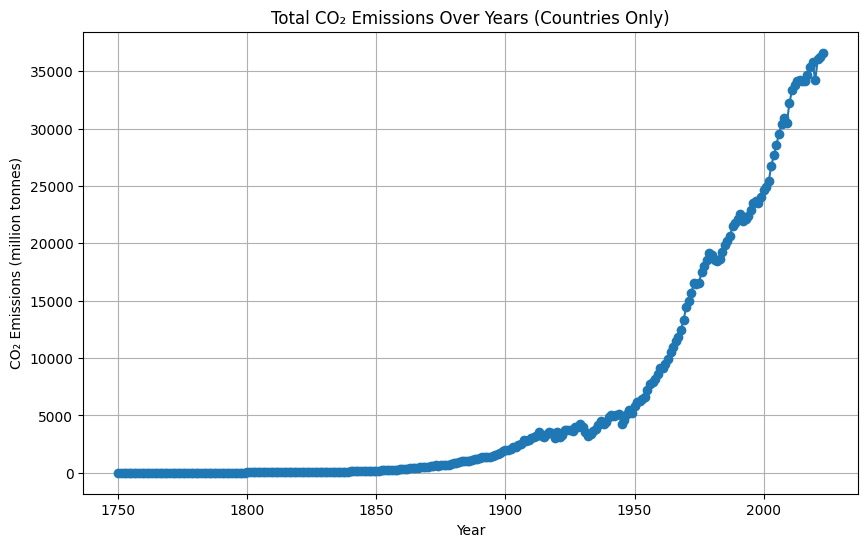

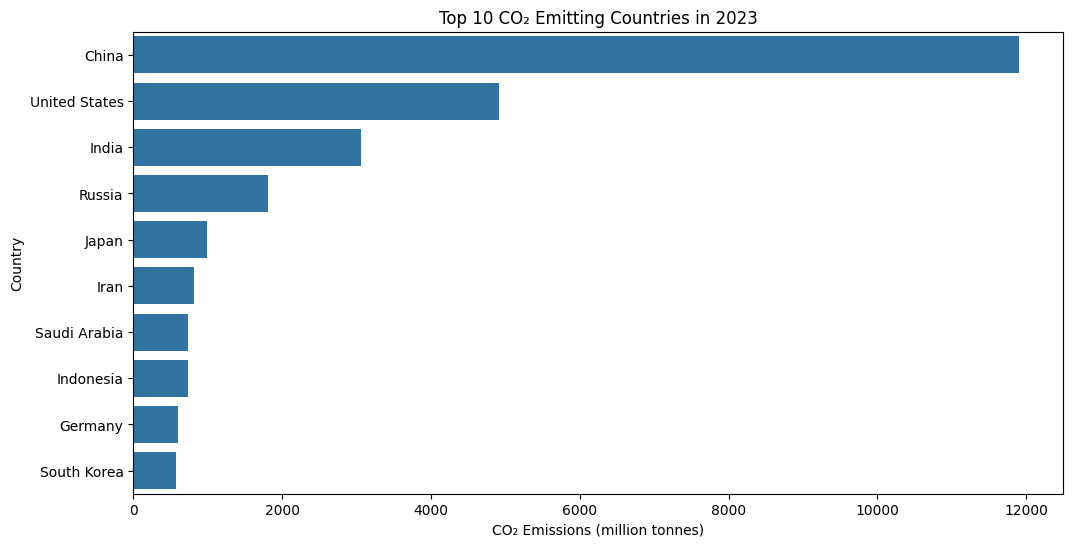

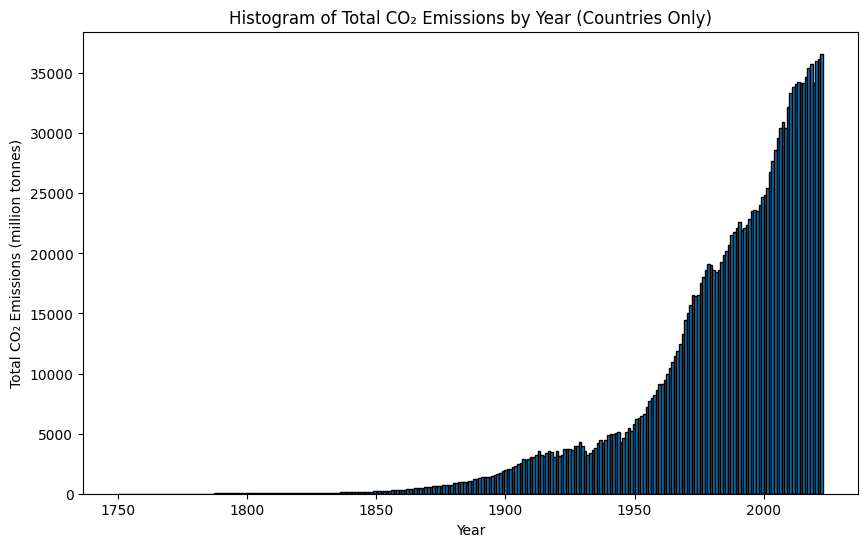

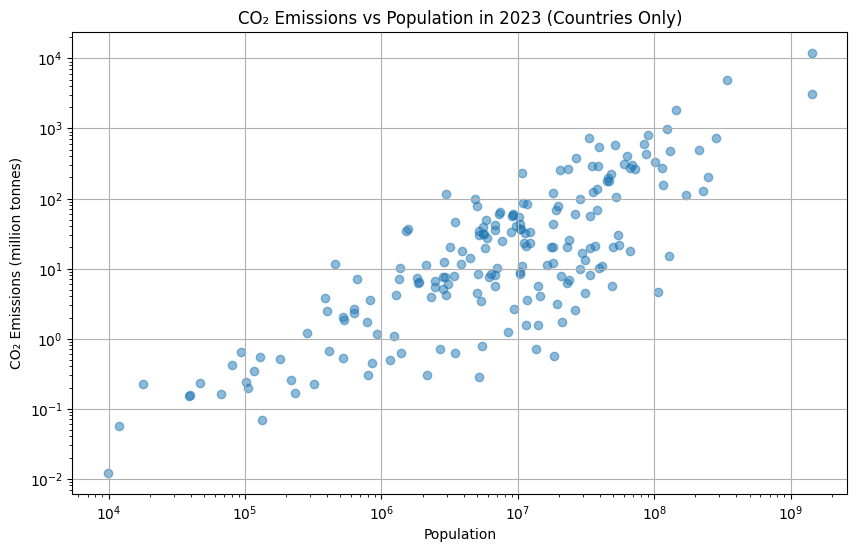

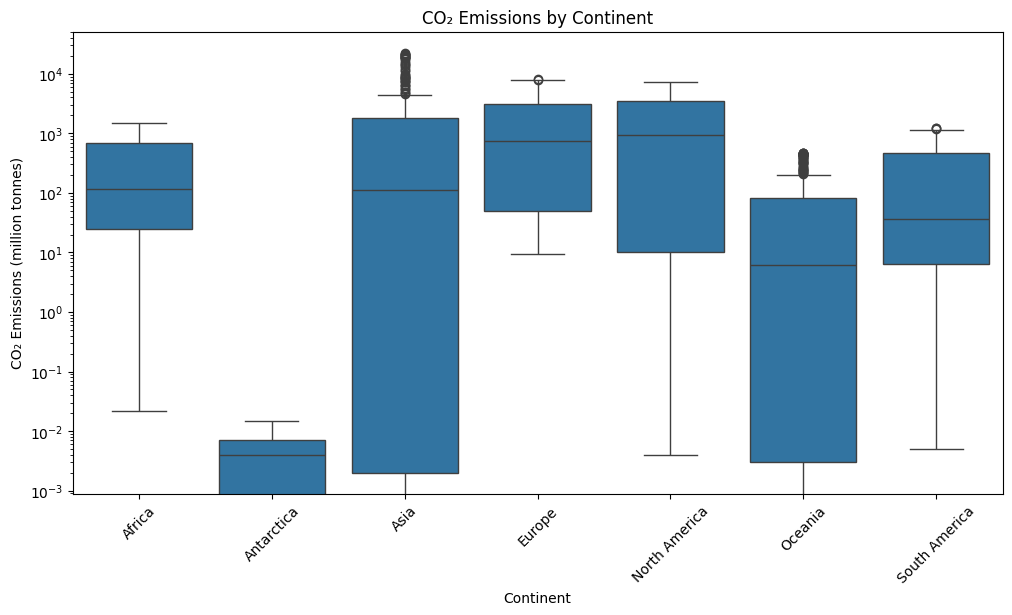

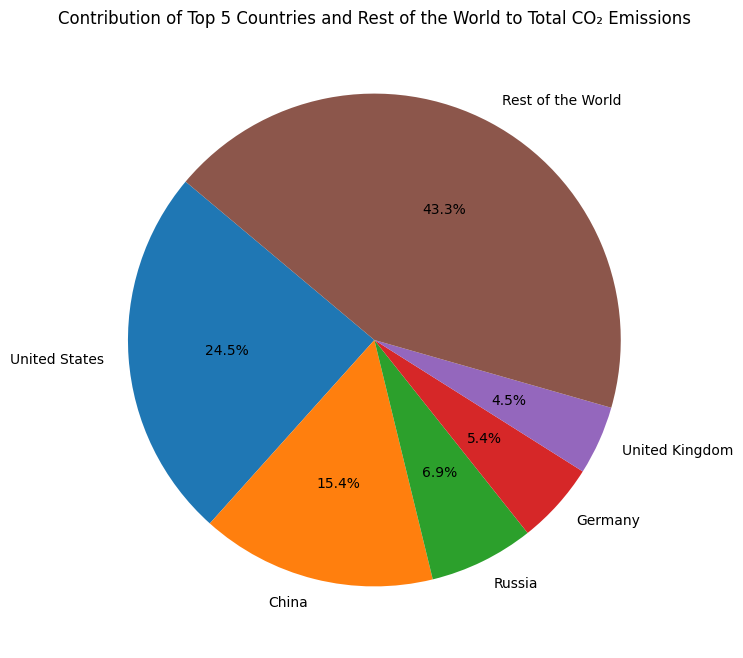

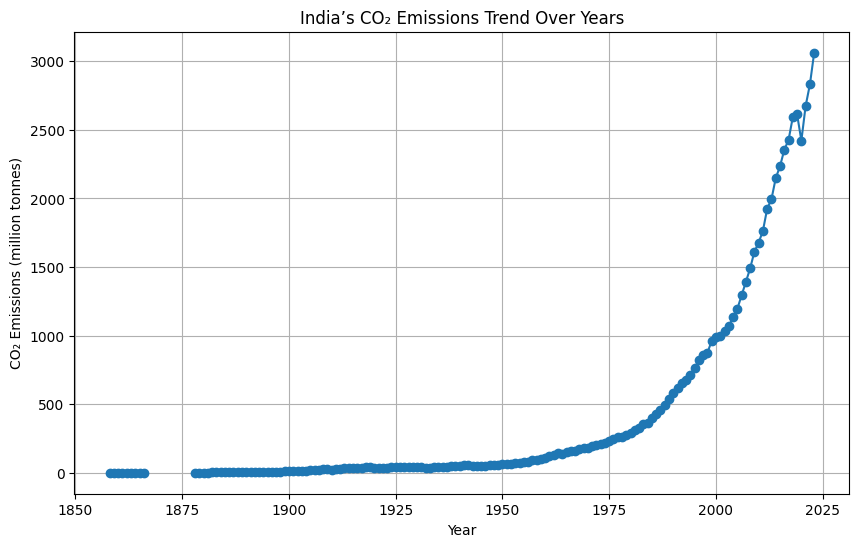

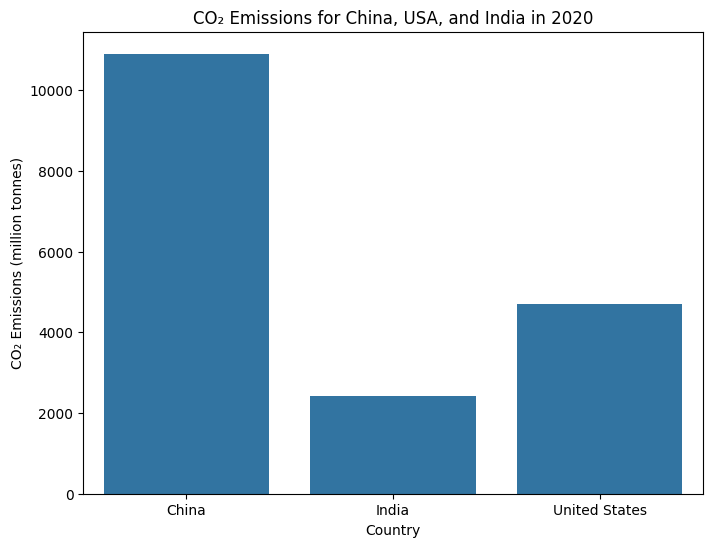

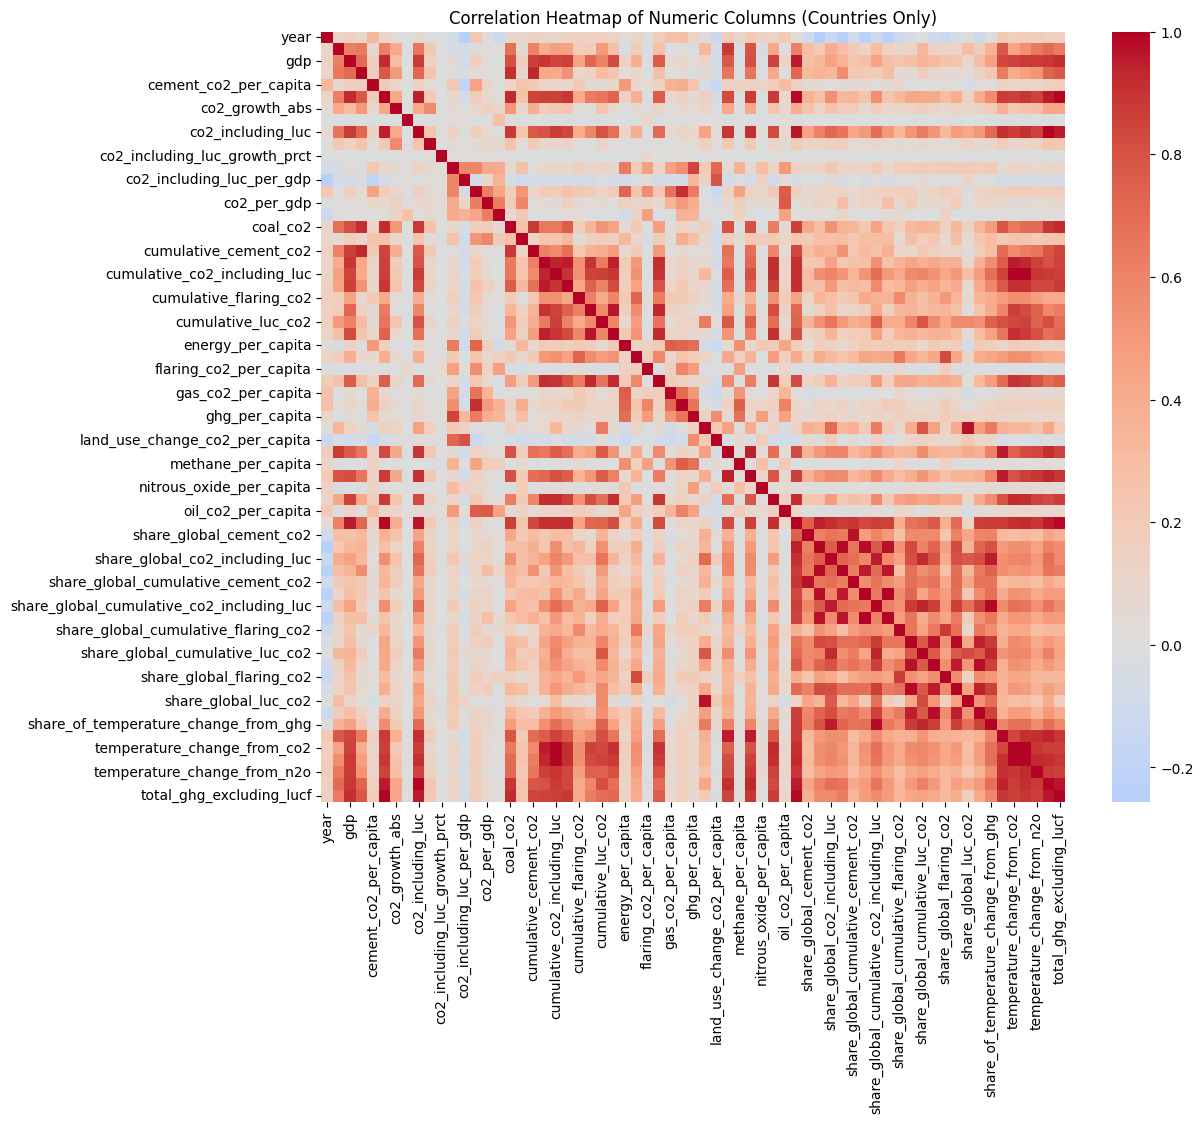

In [22]:
total_emissions_year = df_countries.groupby('year')['co2'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_emissions_year.index, total_emissions_year.values, marker='o')
plt.title('Total CO₂ Emissions Over Years (Countries Only)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.grid(True)
plt.savefig('total_co2_emissions_over_years.png')
plt.show()

top10_latest = df_countries[df_countries['year'] == latest_year][['country', 'co2']].nlargest(10, 'co2')
plt.figure(figsize=(12, 6))
sns.barplot(x='co2', y='country', data=top10_latest)
plt.title(f'Top 10 CO₂ Emitting Countries in {latest_year}')
plt.xlabel('CO₂ Emissions (million tonnes)')
plt.ylabel('Country')
plt.savefig('top10_co2_emitting_countries.png')
plt.show()

total_emissions_year = df_countries.groupby('year')['co2'].sum()
plt.figure(figsize=(10, 6))
plt.hist(total_emissions_year.index, bins=len(total_emissions_year), weights=total_emissions_year.values, edgecolor='black')
plt.title('Histogram of Total CO₂ Emissions by Year (Countries Only)')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (million tonnes)')
plt.savefig('total_co2_emissions_by_year_histogram.png')
plt.show()

df_latest = df_countries[df_countries['year'] == latest_year]
plt.figure(figsize=(10, 6))
plt.scatter(df_latest['population'], df_latest['co2'], alpha=0.5)
plt.title(f'CO₂ Emissions vs Population in {latest_year} (Countries Only)')
plt.xlabel('Population')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.savefig('co2_vs_population_latest_year.png')
plt.show()

continents = ['Africa', 'Antarctica', 'Asia', 'Oceania', 'Europe', 'North America', 'South America']
df_continents = df[df['country'].isin(continents)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='co2', data=df_continents)
plt.title('CO₂ Emissions by Continent')
plt.xlabel('Continent')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.savefig('co2_emissions_by_continent.png')
plt.show()

top5_total = df_countries.groupby('country')['co2'].sum().nlargest(5)
total_emissions = df_countries['co2'].sum()
rest_of_world = total_emissions - top5_total.sum()
pie_data = pd.concat([top5_total, pd.Series({'Rest of the World': rest_of_world})])
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Top 5 Countries and Rest of the World to Total CO₂ Emissions')
plt.savefig('top5_and_rest_of_world_co2_contribution.png')
plt.show()

india_data = df_countries[df_countries['country'] == 'India'][['year', 'co2']].sort_values('year')
plt.figure(figsize=(10, 6))
plt.plot(india_data['year'], india_data['co2'], marker='o')
plt.title('India’s CO₂ Emissions Trend Over Years')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.grid(True)
plt.savefig('india_co2_emissions_trend.png')
plt.show()

countries_2020 = df_countries[(df_countries['year'] == 2020) & (df_countries['country'].isin(['China', 'United States', 'India']))][['country', 'co2']]
plt.figure(figsize=(8, 6))
sns.barplot(x='country', y='co2', data=countries_2020)
plt.title('CO₂ Emissions for China, USA, and India in 2020')
plt.xlabel('Country')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.savefig('co2_emissions_china_usa_india_2020.png')
plt.show()

numeric_cols = df_countries.select_dtypes(include=[np.number]).columns
corr_matrix = df_countries[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Columns (Countries Only)')
plt.savefig('correlation_heatmap_numeric_columns.png')
plt.show()
